In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import kurtosis, skew
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')
%matplotlib inline

sns.set(style="ticks", color_codes=True)



# Importing Data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

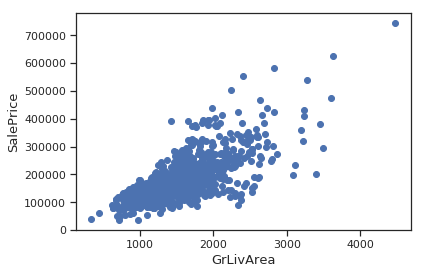

In [4]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()



In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,136,20,RL,80.0,10400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2008,WD,Normal,174000
1,1453,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,145000
2,763,60,FV,72.0,8640,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,Con,Normal,215200
3,933,20,RL,84.0,11670,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,320000
4,436,60,RL,43.0,10667,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,ConLw,Normal,212000


In [6]:
len(train.columns)

81

In [7]:
train_Id = train['Id']
test_Id = test['Id']
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)


 mu = 181330.22 and sigma = 77652.56



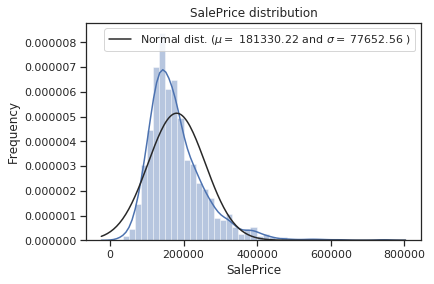

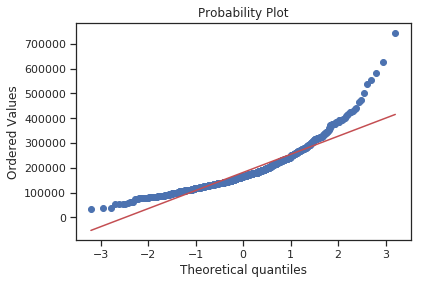

In [8]:
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [9]:
train['SalePrice'] = np.log1p(train['SalePrice'])

In [10]:
train['SalePrice'].head()

0    12.066816
1    11.884496
2    12.279328
3    12.676079
4    12.264346
Name: SalePrice, dtype: float64

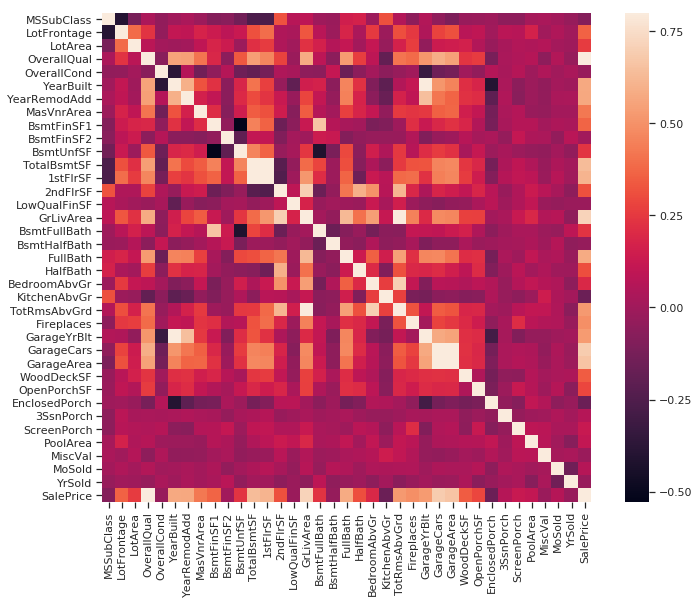

In [11]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [12]:
corrmat["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.817315
GrLivArea        0.715624
GarageCars       0.687771
GarageArea       0.662332
TotalBsmtSF      0.637558
1stFlrSF         0.608198
FullBath         0.582020
YearBuilt        0.572574
YearRemodAdd     0.567964
GarageYrBlt      0.525722
TotRmsAbvGrd     0.523919
Fireplaces       0.488911
MasVnrArea       0.426232
BsmtFinSF1       0.366868
LotFrontage      0.363678
WoodDeckSF       0.344200
2ndFlrSF         0.315387
HalfBath         0.311718
OpenPorchSF      0.289956
LotArea          0.258862
BsmtUnfSF        0.238059
BsmtFullBath     0.230087
BedroomAbvGr     0.195203
ScreenPorch      0.122835
PoolArea         0.106574
MoSold           0.067421
3SsnPorch        0.065941
BsmtFinSF2       0.006599
LowQualFinSF    -0.016807
MiscVal         -0.018760
YrSold          -0.021388
OverallCond     -0.025890
BsmtHalfBath    -0.034414
MSSubClass      -0.084751
EnclosedPorch   -0.160550
KitchenAbvGr    -0.162185
Name: SalePrice, dtype: float64

In [13]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))


all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})


all_data size is : (1458, 79)


In [70]:
ntrain

1020

# Steps we will take :
## Find Correlation between columns with missing values and Target label and fill accordingly
## Find positively correlated features and create new features out of those.

# Filling Missing Values :

Text(0.5, 1.0, 'Percent missing data by feature')

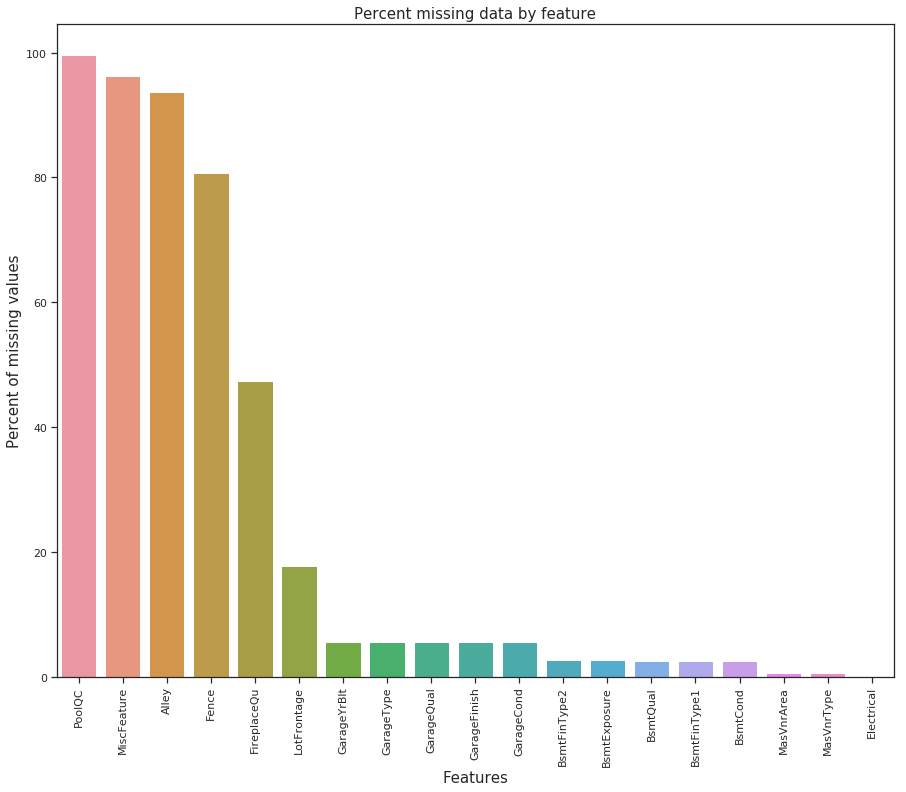

In [14]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

# As we can see there are 19 columns with missing values and the respective percentage of missing values.

In [15]:


#from scipy.stats import rv_discrete 
# def update(val):    
#     global counter
#     print("Counter value is ",counter)
#     counter += 1
#     print("value of val is",val)
#     if(val == 'None'): 
#         print("in if")
#         temp = poolQC_Values[poolQC_fillers[counter]]        
#         counter += 1
#         return temp
        
#     else:
#         return val



# iterator = 0

# def gg(x):
#     print(x)

# temp = all_data['PoolQC'].apply(gg)
# temp[:100]

#all_data['temp'] = all_data['PoolQC'].apply(lambda val: pool)
#all_data['PoolQC'].apply(lambda row: poolQC_Values[poolQC_fillers[counter]] if(row == 'None') else row['PoolQC'],axis = 1 )


# print(all_data.iloc[816,'PoolQC'])
# print(all_data.iloc[827,'PoolQC'])



#poolQC_elements = pd.Series(all_data['PoolQC'].value_counts())
#type(poolQC_elements)
#length = all_data.shape[0]


#print("values :",train['PoolQC'].value_counts())
# poolQC_probabilities = []
#for val in poolQC_elements:
#     print ("Hello ",type(val))
    
# all_data['PoolQC'].head()

#poolQC_elements.index.dtype


# Filling Missing Values

#  (1)PoolQC

### Number of null values are about the same as total number of rows. Hence we can say that PoolQC is independent of salesPrice

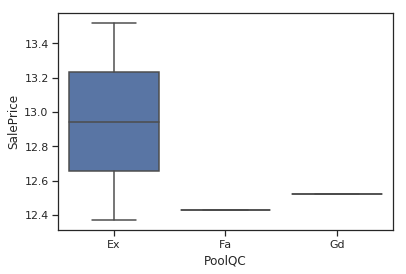

In [16]:
sns.boxplot(x='PoolQC',y='SalePrice',data=train)

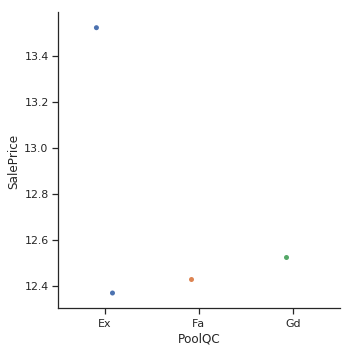

In [17]:
sns.catplot(x="PoolQC", y="SalePrice", data=train);

In [18]:
all_data['PoolQC'].value_counts()

Gd    2
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [19]:
#Find
np.argwhere(all_data.columns == 'PoolQC')

array([[65]])

In [20]:
#Converting PoolQC column to categorical and then using a probability distribution to fill the None values.



print("Total Number of values ", all_data['PoolQC'].shape[0])
print("Number of Null Values",all_data['PoolQC'].isna().sum())

#Filling NaN with None because if you convert to categorical without filling out NaN values, pandas does not consider NaN 
# as one of the values  in the categorical column. 

# (1) Filling NaN with None values and make  the column categorical
all_data["PoolQC"] = all_data.PoolQC.fillna("None")
all_data['PoolQC'] = pd.Categorical(all_data.PoolQC)

# (2) Finding probabilities of each occurance 

print("Before filling :")
print(all_data['PoolQC'].value_counts())



# Count of 'Ex' : 2
# Count of 'Gd' : 2
# Count of 'Fa' : 2
#Count of 'None' : 1452

poolQC_probabilities = [0.98,0.006666667,0.006666667,0.006666667]
poolQC_Values = ['None','Gd','Fa','Ex']


#We need to replace only the 'None' type. Generating a sample from probability distribution
indices = all_data[all_data['PoolQC'] == 'None'].index


# (3) Use a distribution to fill out "None" values now.
all_data.iloc[indices,65] = np.random.choice(poolQC_Values,len(indices),p=poolQC_probabilities)



Total Number of values  1458
Number of Null Values 1452
Before filling :
None    1452
Gd         2
Fa         2
Ex         2
Name: PoolQC, dtype: int64


In [21]:
print("After filling values using probability distribution")
all_data.PoolQC.value_counts()

After filling values using probability distribution


None    1426
Ex        15
Gd        11
Fa         6
Name: PoolQC, dtype: int64

# (2)MiscFeature

In [22]:
all_data['MiscFeature'].shape[0]
all_data.MiscFeature.value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

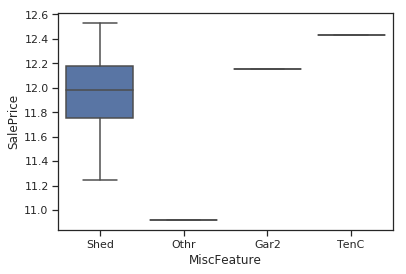

In [23]:
sns.boxplot(x='MiscFeature',y='SalePrice',data=train)

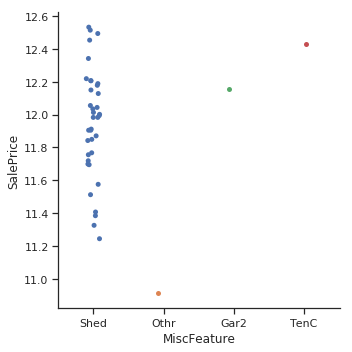

In [24]:
sns.catplot(x="MiscFeature", y="SalePrice", data=train);

In [25]:
#Number of Missing values in MiscFeature
all_data.MiscFeature.isna().sum()  #  1404 Null values in this column 



#Filling NaN with None because if you convert to categorical without filling out NaN values, pandas does not consider NaN 
# as one of the values  in the categorical column. 

# (1) Filling NaN with None values and make  the column categorical
all_data["MiscFeature"] = all_data['MiscFeature'].fillna("None")
all_data['MiscFeature'] = pd.Categorical(all_data['MiscFeature'])

all_data.MiscFeature = all_data.MiscFeature.astype('category')


# (2) Finding probabilities of each occurance 
print("Before filling :")
print(all_data['MiscFeature'].value_counts())





# Count of 'None' : 1404
# Count of 'Shed' : 49
# Count of 'Othr' : 2
#Count of 'Gar2' : 2
#Count of 'TenC' : 1




MiscFeature_probabilities = [0.962962963,0.033607682,0.001371742,0.001371742,0.000685871]
MiscFeature_Values = ['None','Shed','Othr','Gar2','TenC']


#We need to replace only the 'None' type. Generating a sample from probability distribution
indices = all_data[all_data['MiscFeature'] == 'None'].index


#Find the column index so as to use 'iloc'   . 56 is the col
np.argwhere(all_data.columns == 'MiscFeature')


# (3) Use a distribution to fill out "None" values now.
all_data.iloc[indices,56] = np.random.choice(MiscFeature_Values,len(indices),p=MiscFeature_probabilities)




Before filling :
None    1404
Shed      49
Othr       2
Gar2       2
TenC       1
Name: MiscFeature, dtype: int64


In [26]:
print("After filling values using probability distribution")
all_data['MiscFeature'].value_counts()

After filling values using probability distribution


None    1338
Shed     111
Gar2       4
Othr       3
TenC       2
Name: MiscFeature, dtype: int64

# (3)Alley  

In [27]:
all_data['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

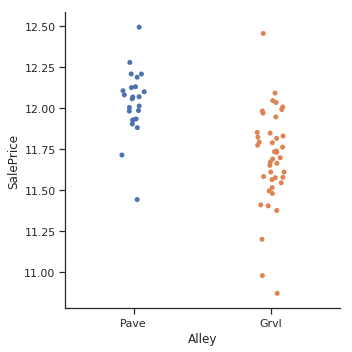

In [28]:
sns.catplot(x="Alley", y="SalePrice", data=train);

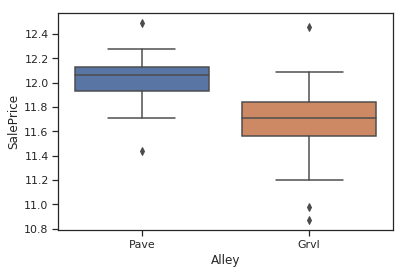

In [29]:
sns.boxplot(x='Alley',y='SalePrice',data=train);

In [30]:
#Number of Missing values in Alley
all_data['Alley'].isna().sum()  #  1367 Null values in this column 



#Filling NaN with None because if you convert to categorical without filling out NaN values, pandas does not consider NaN 
# as one of the values  in the categorical column. 

# (1) Filling NaN with None values and make  the column categorical
all_data["Alley"] = all_data['Alley'].fillna("None")
all_data['Alley'] = pd.Categorical(all_data['Alley'])



# (2) Finding probabilities of each occurance 

print("Before filling :")
print(all_data['Alley'].value_counts())


# Count of 'None' : 1367
# Count of 'Grvl' : 50
# Count of 'Pave' : 41





Alley_probabilities = [0.937585734,0.034293553,0.028120713]
Alleyy_Values = ['None','Grvl','Pave']


#We need to replace only the 'None' type. Generating a sample from probability distribution
indices = all_data[all_data['Alley'] == 'None'].index


#Find the column index so as to use 'iloc'   . 3 is the col
np.argwhere(all_data.columns == 'Alley')


# (3) Use a distribution to fill out "None" values now.
all_data.iloc[indices,3] = np.random.choice(Alleyy_Values,len(indices),p=Alley_probabilities)

Before filling :
None    1367
Grvl      50
Pave      41
Name: Alley, dtype: int64


In [31]:
print("After filling values using probability distribution")
all_data['Alley'].value_counts()

After filling values using probability distribution


None    1293
Grvl      96
Pave      69
Name: Alley, dtype: int64

#  (3) Fence

In [32]:
all_data['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

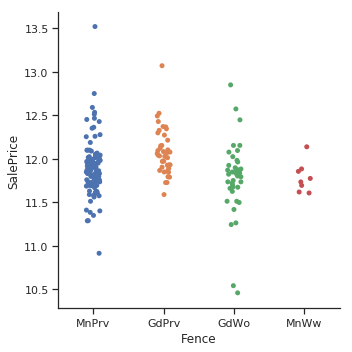

In [33]:
sns.catplot(x='Fence',y='SalePrice',data=train)

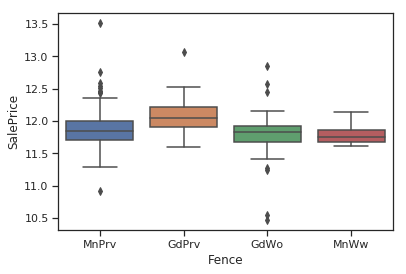

In [34]:
sns.boxplot(x='Fence',y='SalePrice',data=train)

In [35]:
#Number of Missing values in Alley
all_data['Fence'].isna().sum()  #  1177 Null values in this column 



#Filling NaN with None because if you convert to categorical without filling out NaN values, pandas does not consider NaN 
# as one of the values  in the categorical column. 

# (1) Filling NaN with None values and make  the column categorical
all_data["Fence"] = all_data['Fence'].fillna("None")
all_data['Fence'] = pd.Categorical(all_data['Fence'])



# (2) Finding probabilities of each occurance 

print("Before filling :")
print(all_data['Fence'].value_counts())


# Count of 'None' : 1177
# Count of 'MnPrv' : 157
# Count of 'GdPrv' : 59
# Count of 'GdWo' : 54
# Count of 'MnWw' : 11





Fence_probabilities = [0.807270233,0.107681756,0.040466392,0.037037037,0.007544582]
Fence_Values = ['None','MnPrv','GdPrv','GdWo','MnWw']


#We need to replace only the 'None' type. Generating a sample from probability distribution
indices = all_data[all_data['Fence'] == 'None'].index


#Find the column index so as to use 'iloc'   . 25 is the col
np.argwhere(all_data.columns == 'Fence')


# (3) Use a distribution to fill out "None" values now.
all_data.iloc[indices,25] = np.random.choice(Fence_Values,len(indices),p=Fence_probabilities)



Before filling :
None     1177
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64


In [36]:
print("After filling values using probability distribution")
all_data['Fence'].value_counts()

After filling values using probability distribution


None     955
MnPrv    280
GdPrv    109
GdWo      95
MnWw      19
Name: Fence, dtype: int64

# (4) FirePlace

In [37]:
all_data['FireplaceQu'].value_counts()

Gd    378
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

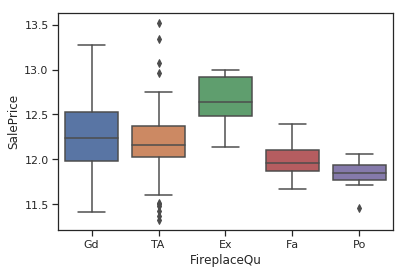

In [38]:
sns.boxplot(x='FireplaceQu',y='SalePrice',data=train)

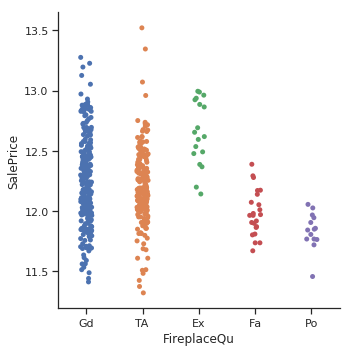

In [39]:
sns.catplot(x='FireplaceQu',y='SalePrice',data=train)

In [40]:
np.argwhere(all_data.columns == 'FireplaceQu')

array([[26]])

In [41]:
#Number of Missing values in FireplaceQu
all_data['FireplaceQu'].isna().sum()  #  690 Null values in this column 



#Filling NaN with None because if you convert to categorical without filling out NaN values, pandas does not consider NaN 
# as one of the values  in the categorical column. 

# (1) Filling NaN with None values and make  the column categorical
all_data["FireplaceQu"] = all_data['FireplaceQu'].fillna("None")
all_data['FireplaceQu'] = pd.Categorical(all_data['FireplaceQu'])



# (2) Finding probabilities of each occurance 
print("Before filling :")
print(all_data['FireplaceQu'].value_counts())


# Count of 'None' : 690
# Count of 'Gd' : 378
# Count of 'TA' : 313
# Count of 'Fa' : 33
# Count of 'Ex' : 24
# Count of 'Po' : 20




FireplaceQu_probabilities = [0.473251029,0.259259259,0.214677641,0.022633745,0.016460905,0.013717421]
FireplaceQu_Values = ['None','Gd','TA','Fa','Ex','Po']


#We need to replace only the 'None' type. Generating a sample from probability distribution
indices = all_data[all_data['FireplaceQu'] == 'None'].index


#Find the column index so as to use 'iloc'   . 26 is the col
np.argwhere(all_data.columns == 'FireplaceQu')


# (3) Use a distribution to fill out "None" values now.
all_data.iloc[indices,26] = np.random.choice(FireplaceQu_Values,len(indices),p=FireplaceQu_probabilities)



Before filling :
None    690
Gd      378
TA      313
Fa       33
Ex       24
Po       20
Name: FireplaceQu, dtype: int64


In [42]:
print("After filling :")
all_data['FireplaceQu'].value_counts()

After filling :


Gd      570
TA      468
None    314
Fa       48
Ex       30
Po       28
Name: FireplaceQu, dtype: int64

# (5) LotFrontage

In [43]:
'''
Assuming houses belonging to the same Neighborhood will have similar LotFrontage, we groupby Neighborhood
and then take mean for each locality. Then we substitute the missing values of a particular Neighborhood with
the mean of that Neighborhood
'''


lotFrontage_df = all_data[['Neighborhood','LotFrontage']].copy()
groupby_Neighborhood = lotFrontage_df.groupby('Neighborhood')

indices = all_data[all_data['LotFrontage'].isna()].index


mean_Neighborhood = groupby_Neighborhood.mean()
mean_Neighborhood.head()


for i in indices:    
    locality = all_data.iloc[i,59]      
    value = mean_Neighborhood.get_value(locality,'LotFrontage')     
    all_data.iloc[i,49] = value
   

# (6)GarageYrBlt (7) GarageArea (8) GarageCar

In [44]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

# (9)GarageType (10) GarageFinish (11) GarageQual (12)GarageCond

In [45]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

In [46]:
#Finding Remaining columns which have any null values
all_data.columns[all_data.isnull().any()].tolist()

['BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'Electrical',
 'MasVnrArea',
 'MasVnrType']

In [47]:
all_data[['BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtQual']].head()

,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual
0,TA,No,Unf,Unf,TA
1,TA,Gd,GLQ,Unf,Gd
2,TA,Mn,GLQ,Unf,Gd
3,Gd,No,Unf,Unf,Ex
4,TA,Av,GLQ,ALQ,Gd


In [48]:
indices = all_data[all_data['BsmtCond'].isna()].index
print(all_data.iloc[indices][['BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtQual']].head())

'''

cols = ['BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtQual']''''''
 When Either of cols is NaN , all the remaining columns in cols are also NaN.
Meaning when a basement doesnt exist, other values also dont exist
We can directly replace NaN with None

'''

    BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 BsmtQual
33       NaN          NaN          NaN          NaN      NaN
102      NaN          NaN          NaN          NaN      NaN
118      NaN          NaN          NaN          NaN      NaN
133      NaN          NaN          NaN          NaN      NaN
152      NaN          NaN          NaN          NaN      NaN


"\n\ncols = ['BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtQual']\n When Either of cols is NaN , all the remaining columns in cols are also NaN.\nMeaning when a basement doesnt exist, other values also dont exist\nWe can directly replace NaN with None\n\n"

In [49]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

In [50]:
for col in ('BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtQual'):
    all_data[col] = all_data[col].fillna('None')

In [51]:
#Remaining Cols:
all_data.columns[all_data.isnull().any()].tolist()

['Electrical', 'MasVnrArea', 'MasVnrType']

In [52]:
indices = all_data[all_data['Electrical'].isna()].index
indices

#Electrical has only 1 Null value , hence replacing by most frequently occuring value i.e. mode of the column
all_data['Electrical'].isna().sum()


1

In [53]:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])


#Similarly for Exterior1st, Exterior2nd,SaleType and KitchenQual
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])



  # 'MasVnrArea','MasVnrType'

In [54]:
all_data[['MasVnrArea','MasVnrType']]
indices = all_data[all_data['MasVnrArea'] == 0].index
len(indices)

861

In [55]:
len(all_data.iloc[indices]['MasVnrType'])
# When MasVnrArea is 0 then MasVnrType is None
#Hence we will fill null values with correspondingly

861

In [56]:
all_data['MasVnrArea'] = all_data['MasVnrArea'].fillna(0)
all_data['MasVnrType'] = all_data['MasVnrType'].fillna('None')

In [57]:
all_data['Utilities'].value_counts()
# Only 1 value is 'NoSewa' and that value is in training set only and not in test set.
#Removing this col as it will not help in predicting the output


all_data = all_data.drop(['Utilities'], axis=1)



### Other Cols

In [58]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

# No remaining cols with missing values


In [59]:
all_data.columns[all_data.isnull().any()].tolist()

[]

In [60]:
train[:10]


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,20,RL,80.0,10400,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,5,2008,WD,Normal,12.066816
1,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,11.884496
2,60,FV,72.0,8640,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2010,Con,Normal,12.279328
3,20,RL,84.0,11670,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,12.676079
4,60,RL,43.0,10667,Pave,NaN,IR2,Lvl,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,4,2009,ConLw,Normal,12.264346
5,80,RL,82.0,9020,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,GdPrv,NaN,0,6,2008,WD,Normal,12.034697
6,60,RL,70.0,11218,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,400,5,2010,WD,Normal,12.149508
7,80,RL,85.0,13825,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,11.849405
8,60,RL,NaN,13031,Pave,NaN,IR2,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,12.141539
9,60,FV,100.0,12552,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,GdWo,NaN,0,5,2010,WD,Normal,12.448631


In [61]:
# MSSubClass is categorical as only a certain set of numbers are appearing. Hence converting it to categorical


all_data['MSSubClass'].unique()
#array([ 20, 180,  60,  80,  50,  75,  30,  70,  90, 120,  45, 190,  85,  160,  40])

all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)



In [62]:
# OverallCond is categorical as only a certain set of numbers are appearing. Hence converting it to categorical


all_data['OverallCond'].unique()
#array([6, 5, 7, 8, 3, 4, 9, 2, 1])

all_data['OverallCond'] = all_data['OverallCond'].apply(str)

In [63]:
#Unlike Yrbuilt , YrSold is taking only a set of numbers converting it to categorical.
all_data['YrSold'].unique()
#array([2008, 2006, 2010, 2007, 2009])

all_data['YrSold'] = all_data['YrSold'].astype(str)

#Similarly for MonthSold ie MoSold
all_data['MoSold'].unique()
#array([ 5,  6,  3,  4, 12,  7,  8, 11,  1, 10,  2,  9])

all_data['MoSold'] = all_data['MoSold'].astype(str)

In [64]:
#As linear regression works only on columns with numeric values , Using labelEncoder to convert 
#the categorical colums to a numeric values


#Set of columns which have categorical values:

columns = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')


for column in columns:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[column].values)) 
    all_data[column] = lbl.transform(list(all_data[column].values))

In [65]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)

NameError: name 'skewness' is not defined

In [66]:
# This will map the labels of categorical data to 0,1,2,3 etc.
all_data = pd.get_dummies(all_data)

In [67]:
all_data.to_csv('./actual.csv')

In [182]:
# As total square feet is important. Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']


In [183]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

corrmat["SalePrice"].sort_values(ascending=False)[1:9]

#These features are positively correlated with the salePrice hence creating new features by 
#taking 3 polynomials square, cube and square root 

# OverallQual    0.817315
# GrLivArea      0.715624
# GarageCars     0.687771
# GarageArea     0.662332
# TotalBsmtSF    0.637558
# 1stFlrSF       0.608198
# FullBath       0.582020
# YearBuilt      0.572574


def positiveCorrelatedFeatures():
    all_data["OverallQual-s2"] = all_data["OverallQual"] ** 2
    all_data["OverallQual-s3"] = all_data["OverallQual"] ** 3
    all_data["OverallQual-Sq"] = np.sqrt(all_data["OverallQual"])
    
    all_data["GrLivArea-s2"] = all_data["GrLivArea"] ** 2
    all_data["GrLivArea-s3"] = all_data["GrLivArea"] ** 3
    all_data["GrLivArea-Sq"] = np.sqrt(all_data["GrLivArea"])
    
    all_data["GarageCars-s2"] = all_data["GarageCars"] ** 2
    all_data["GarageCars-s3"] = all_data["GarageCars"] ** 3
    all_data["GarageCars-Sq"] = np.sqrt(all_data["GarageCars"])
    
    
    all_data["GarageArea-s2"] = all_data["GarageArea"] ** 2
    all_data["GarageArea-s3"] = all_data["GarageArea"] ** 3
    all_data["GarageArea-Sq"] = np.sqrt(all_data["GarageArea"])
    
    
    all_data["TotalBsmtSF-s2"] = all_data["TotalBsmtSF"] ** 2
    all_data["TotalBsmtSF-s3"] = all_data["TotalBsmtSF"] ** 3
    all_data["TotalBsmtSF-Sq"] = np.sqrt(all_data["TotalBsmtSF"])
    
    
    all_data["1stFlrSF-s2"] = all_data["1stFlrSF"] ** 2
    all_data["1stFlrSF-s3"] = all_data["1stFlrSF"] ** 3
    all_data["1stFlrSF-Sq"] = np.sqrt(all_data["1stFlrSF"])
    
    all_data["FullBath-s2"] = all_data["FullBath"] ** 2
    all_data["FullBath-s3"] = all_data["FullBath"] ** 3
    all_data["FullBath-Sq"] = np.sqrt(all_data["FullBath"])
    
    all_data["YearBuilt-s2"] = all_data["YearBuilt"] ** 2
    all_data["YearBuilt-s3"] = all_data["YearBuilt"] ** 3
    all_data["YearBuilt-Sq"] = np.sqrt(all_data["YearBuilt"])
    
    
    
    all_data["TotalSF-s2"] = all_data["TotalSF"] ** 2
    all_data["TotalSF-s3"] = all_data["TotalSF"] ** 3
    all_data["TotalSF-Sq"] = np.sqrt(all_data["TotalSF"])

    
# Rwarding / Giving importance to positively correlated features.
positiveCorrelatedFeatures()  


In [184]:

train = all_data[:ntrain]
test = all_data[ntrain:]


In [185]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [186]:
#Lasso
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))


#ElasticNet
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

#Kernel Ridge regression
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)



In [187]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [188]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)



In [189]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)


In [190]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))



score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))


Lasso score: 0.1127 (0.0074)

ElasticNet score: 0.1129 (0.0074)

Kernel Ridge score: 3.9671 (2.6681)

Gradient Boosting score: 0.1137 (0.0075)

Xgboost score: 0.1208 (0.0076)

LGBM score: 0.1176 (0.0072)



In [191]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [192]:


averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))



 Averaged base models score: 1.0108 (0.6604)



In [193]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [194]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.1086 (0.0089)


In [195]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [196]:

stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

0.0728310859790653


In [197]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))


0.08062643587440334


In [198]:


model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))




0.06143503864002897


In [199]:
'''RMSE on the entire Train data when averaging'''

print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.70 +
               xgb_train_pred*0.15 + lgb_train_pred*0.15 ))

RMSLE score on train data:
0.07019563348524795


In [200]:
ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15

In [201]:
test = pd.read_csv('test.csv')

In [202]:
sub = pd.DataFrame()
sub['Id'] = test_Id
sub['SalePrice'] = ensemble
sub.to_csv('submission.csv',index=False)